### Data Import & EDA (Exploratory Data Analysis)

[*********************100%%**********************]  1 of 1 completed


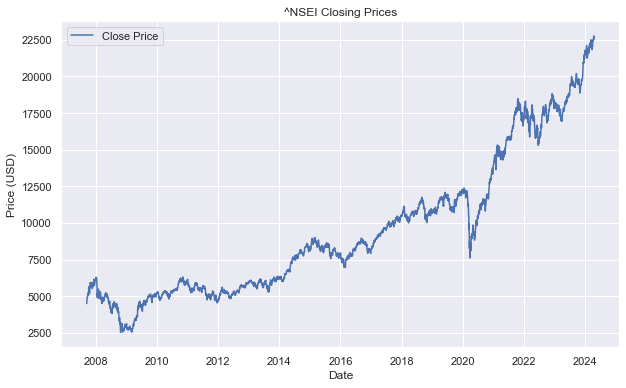

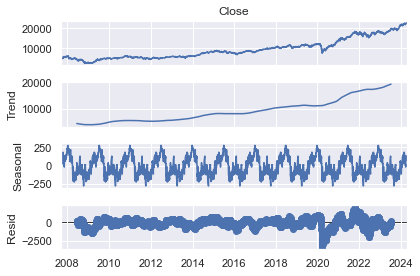

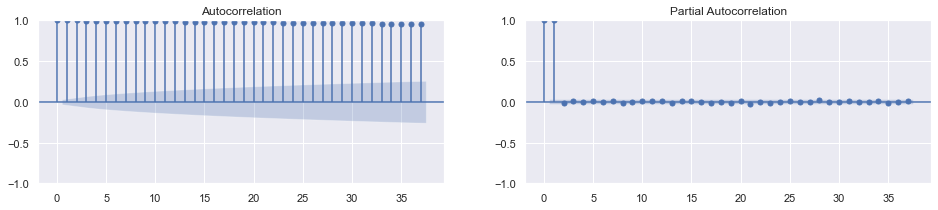

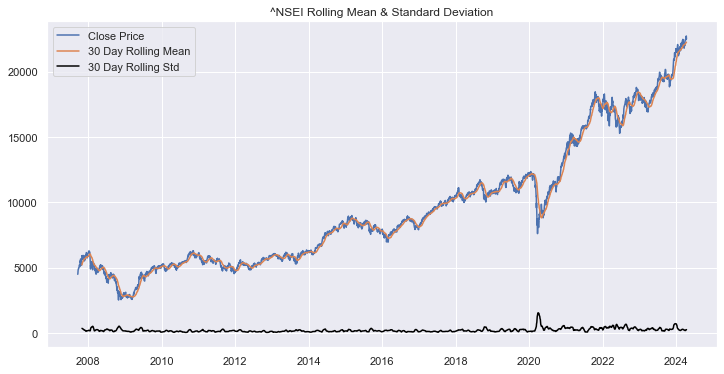

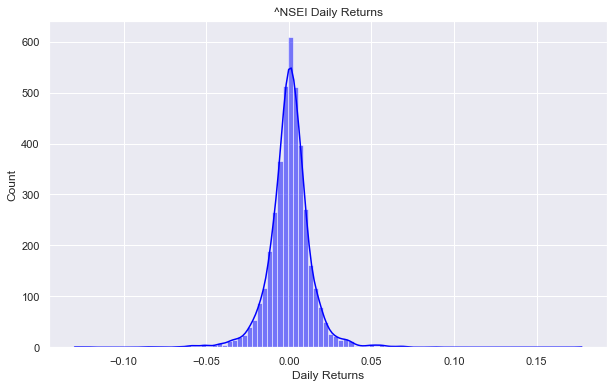

In [56]:
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

sns.set_theme()

# Function to fetch historical data from Yahoo Finance
def fetch_data(ticker):
    data = yf.download(ticker)
    close_prices = data[['Open', 'High', 'Low', 'Close', 'Volume']]
    return close_prices

def perform_eda(data, ticker):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price')
    plt.title(f'{ticker} Closing Prices')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Decomposing to trend, seasonality, and residuals
    decomposition = seasonal_decompose(data['Close'], model='additive', period=365)
    fig = decomposition.plot()
    plt.show()
    
    # Autocorrelation and Partial Autocorrelation Plots
    fig, ax = plt.subplots(1, 2, figsize=(16, 3))
    plot_acf(data['Close'], ax=ax[0])
    plot_pacf(data['Close'], ax=ax[1])
    plt.show()
    
    # Rolling Statistics for Volatility Analysis
    data['30 Day Rolling Mean'] = data['Close'].rolling(window=30).mean()
    data['30 Day Rolling Std'] = data['Close'].rolling(window=30).std()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price')
    plt.plot(data['30 Day Rolling Mean'], label='30 Day Rolling Mean')
    plt.plot(data['30 Day Rolling Std'], label='30 Day Rolling Std', color='black')
    plt.title(f'{ticker} Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()
    
    # Daily Returns
    data['Daily Returns'] = data['Close'].pct_change()
    plt.figure(figsize=(10, 6))
    sns.histplot(data['Daily Returns'].dropna(), bins=100, kde=True, color='blue')
    plt.title(f'{ticker} Daily Returns')
    plt.show()

ticker = '^NSEI'  
data = fetch_data(ticker)
perform_eda(data, ticker)




In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Correlation Matrix Heatmap
def plot_correlation_matrix(data, ticker):
    correlation_matrix = data.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f'{ticker} Correlation Matrix')
    plt.show()

# Moving Average Convergence Divergence (MACD)
def plot_macd(data, ticker):
    short_ema = data['Close'].ewm(span=12, adjust=False).mean()
    long_ema = data['Close'].ewm(span=26, adjust=False).mean()
    macd = short_ema - long_ema
    signal = macd.ewm(span=9, adjust=False).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(data.index, macd, label='MACD', color='red')
    plt.plot(data.index, signal, label='Signal Line', color='blue')
    plt.legend(loc='upper left')
    plt.title(f'{ticker} MACD')
    plt.show()

# Bollinger Bands
def plot_bollinger_bands(data, ticker):
    rolling_mean = data['Close'].rolling(window=20).mean()
    rolling_std = data['Close'].rolling(window=20).std()
    upper_band = rolling_mean + (rolling_std * 2)
    lower_band = rolling_mean - (rolling_std * 2)

    plt.figure(figsize=(12, 6))
    plt.plot(data['Close'], label='Close Price', color='blue')
    plt.plot(rolling_mean, label='Rolling Mean', color='black')
    plt.plot(upper_band, label='Upper Bollinger Band', color='red')
    plt.plot(lower_band, label='Lower Bollinger Band', color='green')
    plt.title(f'{ticker} Bollinger Bands')
    plt.legend()
    plt.show()

# Candlestick Chart
def plot_candlestick(data, ticker):
    mpf.plot(data[-60:], type='candle', style='charles', title=f'{ticker} Last 60 Days Candlestick Chart', volume=True)

# Fourier Transform for Trend Analysis
def plot_fourier_transform(data, ticker):
    close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
    fft_df = pd.DataFrame({'fft': close_fft})
    fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
    fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

    plt.figure(figsize=(14, 7))
    fft_list = np.asarray(fft_df['fft'].tolist())
    for num_ in [3, 6, 9, 100]:
        fft_list_m10 = np.copy(fft_list); fft_list_m10[num_:-num_] = 0
        plt.plot(np.fft.ifft(fft_list_m10), label=f'Fourier transform with {num_} components')
    plt.title(f'{ticker} Fourier Transforms')
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Note: Some of these functions require additional preprocessing or input parameters (e.g., data ranges).
# Ensure you adjust them to fit your specific dataset and analysis needs.


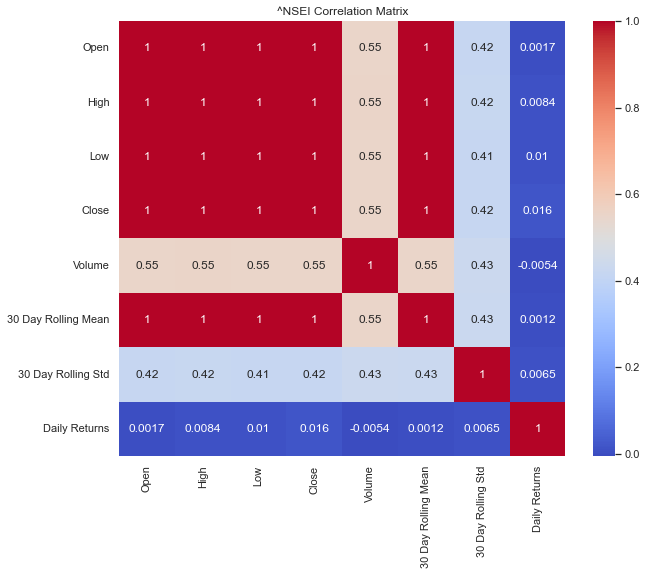

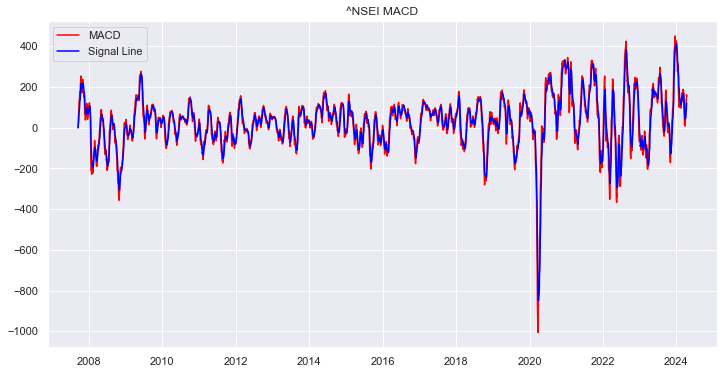

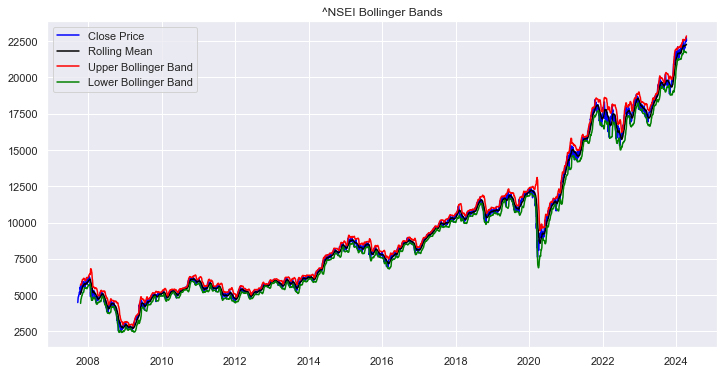

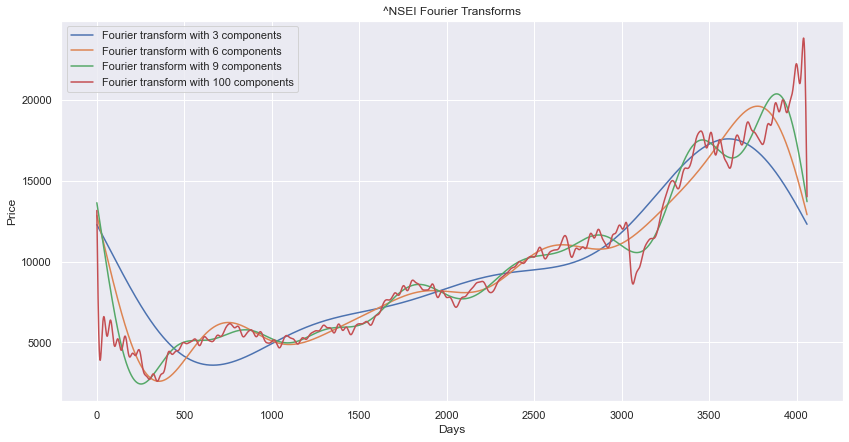

In [58]:
plot_correlation_matrix(data, ticker)

# Run MACD
plot_macd(data, ticker)

# Run Bollinger Bands
plot_bollinger_bands(data, ticker)

# Prepare data for Candlestick Chart
# Note: You may need to adjust your data format to fit mplfinance requirements
ohlc_data = data[['Open', 'High', 'Low', 'Close', 'Volume']]  # Adjust column names as necessary
ohlc_data.index = pd.to_datetime(ohlc_data.index)  # Ensure the index is datetime for mplfinance


# Run Fourier Transform for Trend Analysis
plot_fourier_transform(data, ticker)

### Model Formulation

In [59]:
from neuralforecast.models.nbeats import NBEATS


In [60]:
data = data.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
data['unique_id'] = 'Stock' 

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from neuralforecast.models.nbeats import NBEATS
from neuralforecast.models.nhits import NHITS
from neuralforecast.losses.pytorch import MAE
from neuralforecast import NeuralForecast
from datetime import datetime, timedelta

train_end_date = datetime.now() - timedelta(days=250)

Y_train_df = data[data.ds <= train_end_date]
Y_test_df = data[data.ds > train_end_date]
horizon = len(Y_test_df)





In [64]:
models = [NBEATS(
    h=horizon,
    input_size=20 * horizon,  
    n_harmonics=1,  
    n_polynomials=2,
    stack_types=['trend','seasonality', 'identity'],
    n_blocks=[1, 1, 1], 
    mlp_units=[[256, 256], [256, 256]],  
    activation='ReLU',  
    shared_weights=False,  
    loss=MAE(),  
    max_steps=1000,  
    learning_rate=5e-4,  
    num_lr_decays=2,  
    batch_size=32
)]

nf = NeuralForecast(models=models, freq='D')

nf.fit(df=Y_train_df)

Y_hat_df = nf.predict().reset_index()

Seed set to 1


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

### Result Analysis

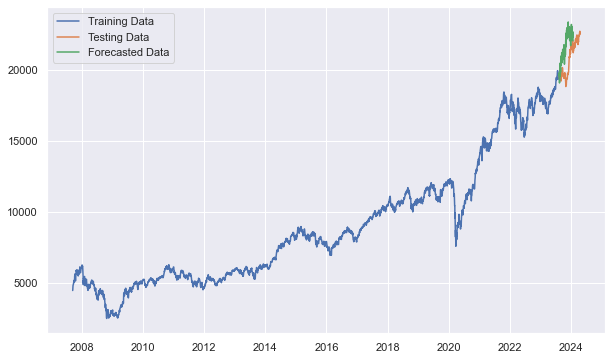

In [45]:
Y_train_df_newer = Y_train_df[-4000:]

plt.figure(figsize=(10, 6))
plt.plot(Y_train_df_newer['ds'], Y_train_df_newer['y'], label='Training Data')
plt.plot(Y_test_df['ds'], Y_test_df['y'], label='Testing Data')
plt.plot(Y_hat_df['ds'], Y_hat_df['NBEATS'], label='Forecasted Data')
plt.legend()
plt.show()